# Linear Regression with TensorFlow 2

This notebook provides a simple example of performing a regression problem with TensorFlow 2. The notebook could be adapted by changing the fitting functions to address a wide variety of regression tasks.

### First, import numpy, matplotlib, and tensorflow

Also, check the TF version.

In [50]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)

2.8.0


## Second, create a function to generate a linear dataset

Set the slope, intercept and gaussian scatter, and then the number of samples.

In [51]:
#a straight line
def line(x,m,b):
    return m*x+b

In [52]:
# linear data with scatter
def generate_data(xmin=0.0, xmax=10.0, m=2.0, b=1.0, s=1.0, n=100):
    #xmin is the minimum range of the data
    #xmax is the maximum range of the data
    #m is the slope
    #b is the intercept
    #s is the gaussian std
    #n is the number of samples
    
    #pick a random location between xmin and xmax
    x = np.asarray(np.random.uniform(low=xmin,high=xmax,size=n),dtype=np.float32)

    #pick a random y location centered on the line
    y = np.asarray(line(x,m,b) + s*np.random.randn(n),dtype=np.float32)
    
    #remember the y error
    y_err = np.full(n,s,dtype=np.float32)
    
    #return the x and y values
    return x,y,y_err

### Go ahead and generate the data

In [53]:
x, y, y_err = generate_data()

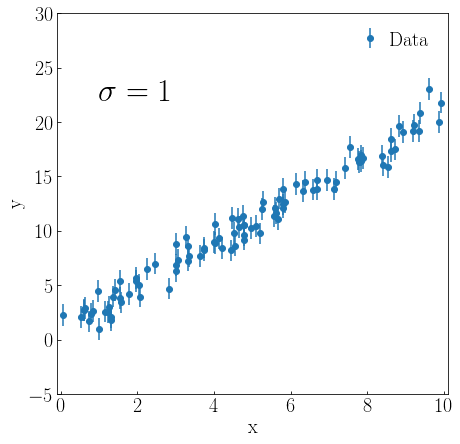

In [54]:
matplotlib.rcParams['font.family'] = ['Family1','serif','Family2']
matplotlib.rcParams['text.usetex'] = 'True'
f,ax = plt.subplots(1,1,figsize=(7,7))
ax.tick_params(axis="both", which="both", direction="in")
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,y_err,fmt='o',label='Data')
ax.set_xlim([-0.1,10.1])
ax.set_ylim([-5.,30])
ax.text(1.,22.,r'$\sigma = 1$',color='0',fontsize=32)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0)

### Let's prepare our fitted model

While there's likely another way, we can declare our fitted variables as global tf.Variables

In [55]:
#slope
m_init = 3.0
m_fit  = tf.Variable(m_init, name='slope')                       # 
#intercept
b_init = 2.0
b_fit  = tf.Variable(b_init, name='intercept') 

#### Now, let's define the model for tensorflow to fit

The function needs to be decorated with the @tf.function decorator.

In [56]:
#define linear model
@tf.function
def linear_model(x):
    return m_fit*x+b_fit

#### We need to define the loss function, using tensorflow

We will use mean-squared error

In [57]:
#define loss function
@tf.function
def mse(y_true, y_pred):
    #mse between true and predicted values
    return tf.losses.mean_squared_error(y_true,y_pred)

#### We also need to define the optimizer that tells us how to do gradient descent

We'll use pre-defined the Adam optimizer from Keras.

In [58]:
#Adam Optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)


## Now we train the model iteratively

In [59]:
#start training
epochs = 5000  #number of epochs to run
display_step = 1000 #number of epochs between printing info to screen

for epoch in range(epochs):
    
    #monitor training / display steps
    if((epoch%display_step)==0):
        pred = linear_model(x)
        loss = mse(pred, y)
        
        #to print this info, we need to convert to numpy arrays
        print(f"Epoch {epoch} | Loss {loss.numpy()}, m: {m_fit.numpy()} b:{b_fit.numpy()}")
        
    #In TF2, gradients are handled using
    #the GradientTape class.
    #begin GradientTape and optimize
    with tf.GradientTape() as g:
        pred = linear_model(x)
        loss = mse(y,pred)
        
    #compute dm, db, the gradients
    #with respect to m_fit and b_fit
    gradients = g.gradient(loss, [m_fit,b_fit])
    
    #update m_fit and b_fit with the gradients x learning
    optimizer.apply_gradients(zip(gradients,[m_fit,b_fit]))
    
    
#print the last answer!
print(f"Epoch {epochs} | Loss {loss.numpy()}, m: {m_fit.numpy()} b:{b_fit.numpy()}")
print("Done!")

Epoch 0 | Loss 42.080448150634766, m: 3.0 b:2.0
Epoch 1000 | Loss 3.750159502029419, m: 2.254687547683716 b:1.2535380125045776
Epoch 2000 | Loss 0.9277796745300293, m: 2.0121405124664307 b:1.005429744720459
Epoch 3000 | Loss 0.9074240922927856, m: 1.9915902614593506 b:0.9741184711456299
Epoch 4000 | Loss 0.9071181416511536, m: 1.9934630393981934 b:0.9610661864280701
Epoch 5000 | Loss 0.9068688750267029, m: 1.995935082435608 b:0.9461504817008972
Done!


## Let's plot the data and the best-fit model

In [60]:
x_model = np.sort(x)
y_model = line(x_model,m_fit,b_fit)

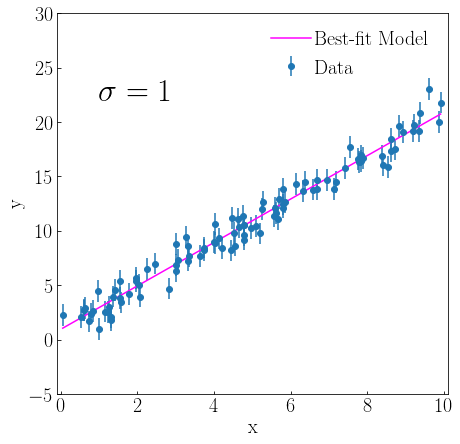

In [61]:
matplotlib.rcParams['font.family'] = ['Family1','serif','Family2']
matplotlib.rcParams['text.usetex'] = 'True'
f,ax = plt.subplots(1,1,figsize=(7,7))
ax.tick_params(axis="both", which="both", direction="in")
for tick in ax.xaxis.get_ticklabels():
    tick.set_fontsize(20)
for tick in ax.yaxis.get_ticklabels():
    tick.set_fontsize(20)
ax.errorbar(x,y,y_err,fmt='o',label='Data')
ax.plot(x_model,y_model,color='magenta',label='Best-fit Model')
ax.set_xlim([-0.1,10.1])
ax.set_ylim([-5.,30])
ax.text(1.,22.,r'$\sigma = 1$',color='0',fontsize=32)
ax.set_xlabel('x',fontsize=20)
ax.set_ylabel('y',fontsize=20)
plt.legend(frameon=False,fontsize=20,handletextpad=0.2)